In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK tools for text processing
import re, nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity =  'all'
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
review_df = pd.read_csv('./data/olist_order_reviews_dataset.csv')

In [3]:
review_df.head()      # vamos a usar 'review_score', 'review_comment_title' y 'review_comment_message'

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [4]:
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [3]:
# seperating the reviews and the titles and dropping the missing rows seperately so that we don't have unequal shapes of rows.
review_data_title = review_df['review_comment_title']
review_data = review_df.drop(['review_comment_title'],axis=1)

# Dropping NaN values
review_data  = review_data.dropna()
review_data_title = review_data_title.dropna()

# Resetting the reviews index and visualizing the data
review_data = review_data.reset_index(drop=True)
review_data.shape
review_data_title.shape

(40977, 6)

(11568,)

In [4]:
 # Transforming the reviews data by removing stopwords, using regular expressions module to accept only letters,
 # tokenizing those words and then making all the words lower case for consistency.
comments = []
stop_words = set(stopwords.words('portuguese'))


for words in review_data['review_comment_message']:
    only_letters = re.sub("[^a-zA-Z]", " ",words)
    tokens = word_tokenize(only_letters, language= 'portuguese') #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))


comments

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedor chegou

In [5]:
print(all(isinstance(i, str) for i in comments))

# if it returns false and there are some non string values,
# comments = [str(x) for x in comments]

True


In [6]:
comments = [i.strip() for i in comments]

In [10]:
# for i, comment in enumerate(comments):
#     try:
#         comments_trans = pd.DataFrame(comments, columns=['comments_br'])
#         comments_trans['comments_br'] = comments_trans['comments_br'].astype('str')
#     except ValueError:
#         print(f'Error at index {i} for comment: {comment}')

In [7]:
print(any(not x.strip() for x in comments))

True


In [8]:
comments = [x for x in comments if x.strip()]

In [9]:
comments_trans = pd.DataFrame(comments, columns=['comments_br'], dtype=str)
#comments_trans['comments_br'] = comments_trans['comments_br'].astype('str')
comments_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40780 entries, 0 to 40779
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   comments_br  40780 non-null  object
dtypes: object(1)
memory usage: 318.7+ KB


In [6]:
from googletrans import Translator
translator = Translator()


comments_trans['comments_en'] = comments_trans['comments_br'].apply(lambda x: translator.translate(text = str(x), src='pt', dest='en').text)


#comments_trans.dropna(subset=['comments_en'], inplace=True)
#if translator.translate(text = str(x), src='pt', dest='en').text is not None else x)



TypeError: the JSON object must be str, bytes or bytearray, not NoneType

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

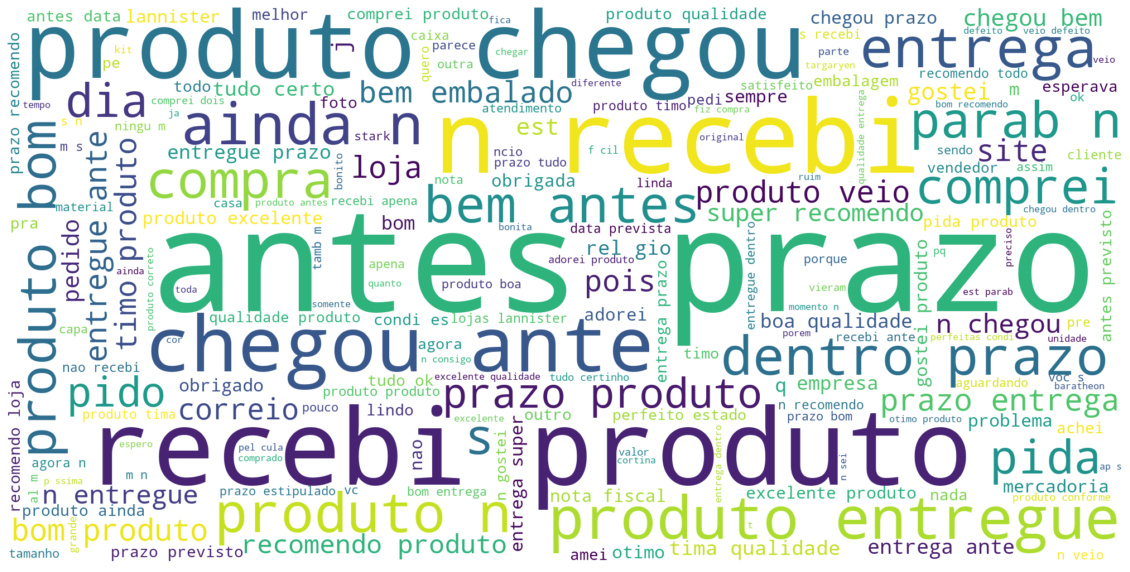

In [5]:
# #Using wordcloud to visualize the comments
# unique_string=(" ").join(comments)
# wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
# plt.figure(figsize=(20,12))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [10]:
# from googletrans import Translator

# translator = Translator()

# # Using CountVectorizer to get the most important trigrams
# co = CountVectorizer(ngram_range=(3,3))
# counts = co.fit_transform(comments)
# important_trigrams = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False).head(50)

# # Next, we reset the index, rename the columns and apply the translate module to get the english translations 
# important_trigrams=important_trigrams.reset_index()
# important_trigrams.rename(columns={'index':'trigrams',0:'frequency'},inplace=True)

# important_trigrams['english_translation'] = important_trigrams['trigrams'].apply(lambda x: translator.translate(text = x, src='pt', dest='en').text)
# important_trigrams

c:\Users\Mag\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,trigrams,frequency,english_translation
0,chegou antes prazo,1108,arrived earlier
1,bem antes prazo,706,well before term
2,entregue antes prazo,608,delivered before
3,produto chegou antes,448,product arrived before
4,entrega antes prazo,432,Delivery before term
5,chegou bem antes,416,arrived well before
6,produto entregue antes,374,product delivered before
7,entrega super pida,297,Super Pida Delivery
8,antes prazo previsto,287,rather expected period
9,produto tima qualidade,257,TIMA QUALITY PRODUCT


In [6]:
# from googletrans import Translator

# translator = Translator()

# # translate_text = Translator().translate(text ='Excelente mochila, entrega super rápida.', src='pt', dest ='en' )
# # print(translate_text)

# review_data['review_comment_message_translated'] = review_data['review_comment_message'].apply(lambda x: Translator().translate(text = x, src='pt', dest='en').text if not pd.isna(x) else None)
# print(review_data['review_comment_message_translated'])


KeyboardInterrupt: 

Calculate polarity: measure of how negative or how positive a piece of text is

In [ ]:
#from textblob import TextBlob

In [ ]:
# Polarity is the measure of the overall combination of the positive and negative emotions in a sentence.
# For TextBlob, Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.

#data_reviews['polarity'] = data_reviews.apply(lambda x: TextBlob(x['review_comment_message'] + x['review_comment_title']).sentiment.polarity if not pd.isna(x['review_comment_message']) and not pd.isna(x['review_comment_title']) else None, axis=1)


In [ ]:
#data_reviews['subjectivity'] = data_reviews.apply(lambda x: TextBlob(x['review_comment_message'] + x['review_comment_title']).sentiment.subjectivity if not pd.isna(x['review_comment_message']) and not pd.isna(x['review_comment_title']) else None, axis=1)

In [ ]:
# def getPolarity(text):
#     if not pd.isna(text):
#         return TextBlob(text).sentiment.polarity
#     else: return 0

# def getSubjectivity(text):
#     if not pd.isna(text):
#         return TextBlob(text).sentiment.subjectivity
#     else: return 0

# data_reviews['polarity'] = data_reviews.apply(lambda x: getPolarity(x['review_comment_message'] + x['review_comment_title']))
# data_reviews['subjectivity'] = data_reviews.apply(lambda x: getSubjectivity(x['review_comment_message'] + x['review_comment_title']))


In [ ]:
#data_reviews['sentiment_class'] = data_reviews['polarity'].apply(lambda x: 'positive' if x >= 0.5 else 'neutral' if x > -0.5 and x < 0.5 else 'negative')